<a href="https://colab.research.google.com/github/knassar10/PINN-tutorial/blob/main/PINN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.5.2
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.14
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              4.9.0
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.21.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.17.0.34.53
astunparse                         1.6.3
atpublic                           5.1
attrs                              25.3.0
audioread            

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.autograd.set_detect_anomaly(True)
torch.manual_seed(128)

Physics Loss

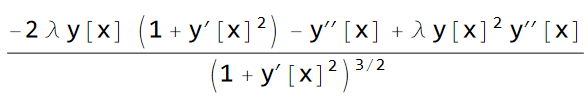



Boundary Loss

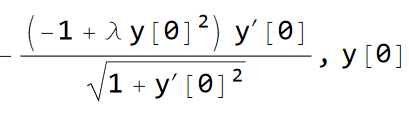

In [ ]:
class FCNet(nn.Module):
  def __init__(self, input_size, hidden_sizes, output_size):
    super(FCNet, self).__init__()
    activation = nn.Tanh
    self.layers = nn.ModuleList()
    prev_size = input_size
    for hidden_size in hidden_sizes:
      self.layers.append(nn.Linear(prev_size, hidden_size))
      self.layers.append(nn.ReLU())
      prev_size = hidden_size
    self.layers.append(nn.Linear(prev_size, output_size))

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [ ]:
pinn = FCNet(input_size=1, hidden_sizes=[32], output_size=1)

# define boundat points for boundary loss
t_boundary = torch.tensor(0., requires_grad=True).view(-1, 1)

# define training potins over the entire domain, for physics loss
t_physics = torch.linespace(0, 1, 30, requires_grad=True).view(-1, 1)

# train the PINN

